In [ ]:
# Install Prophet if not already installed
!pip install prophet
!pip install openpyxl

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpldtd8n6l/xq2i64ke.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpldtd8n6l/y2db3q_q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42594', 'data', 'file=/tmp/tmpldtd8n6l/xq2i64ke.json', 'init=/tmp/tmpldtd8n6l/y2db3q_q.json', 'output', 'file=/tmp/tmpldtd8n6l/prophet_modelmvjlblzs/prophet_model-20241020223349.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:33:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:33:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


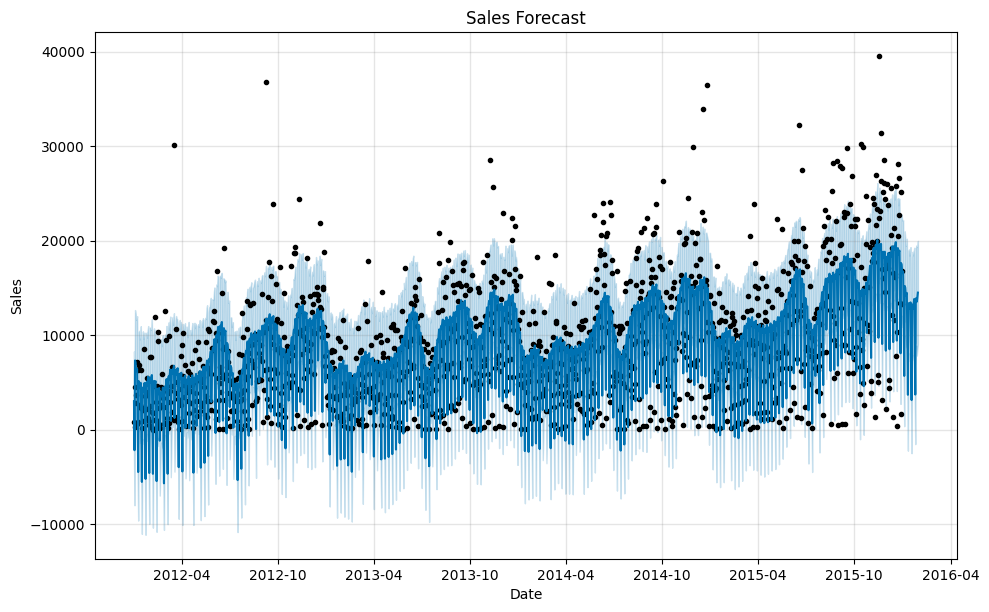

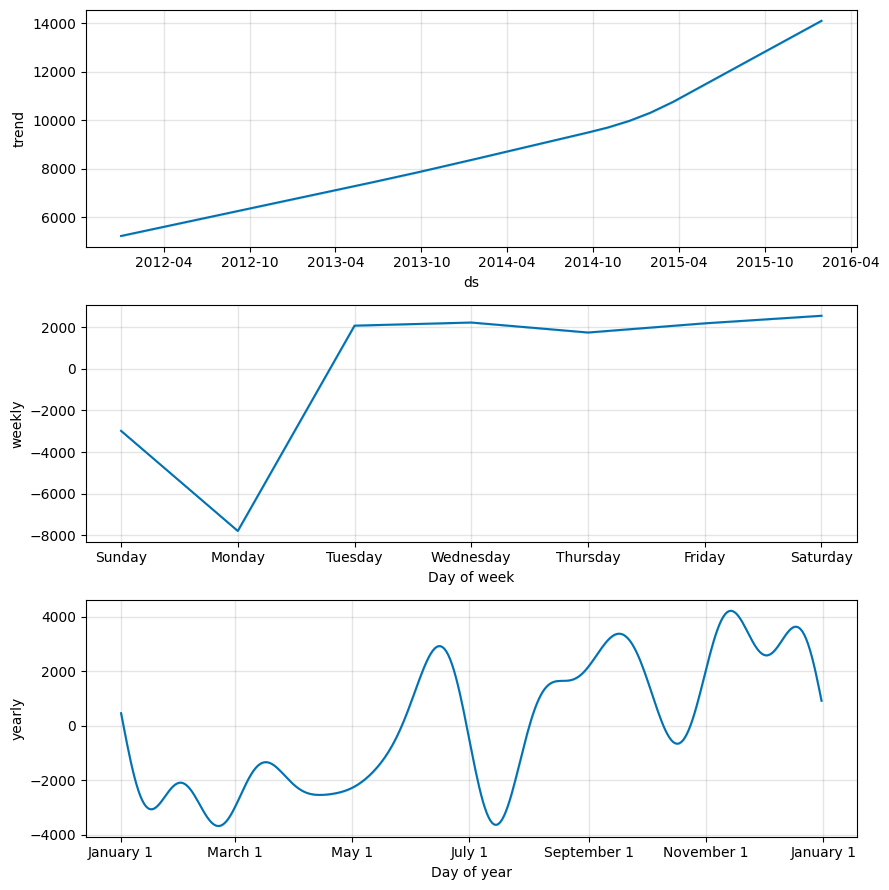

In [21]:
# Install Prophet if not already installed
# !pip install prophet

import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('/content/drive/MyDrive/global_superstore.xlsx')

# Convert 'Order Date' to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Aggregate sales by date
daily_sales = data.groupby('Order Date')['Sales'].sum().reset_index()

# Prepare data for Prophet
daily_sales.columns = ['ds', 'y']  # Prophet requires columns 'ds' (date) and 'y' (value)

# Initialize the Prophet model
model = Prophet()

# Fit the model to your data
model.fit(daily_sales)

# Create a DataFrame to hold predictions
future_dates = model.make_future_dataframe(periods=30)  # Forecasting 30 days ahead

# Predict future sales
forecast = model.predict(future_dates)

# Plot the forecast
model.plot(forecast)
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Optional: Plot forecast components (trend, weekly, yearly seasonality)
model.plot_components(forecast)
plt.show()


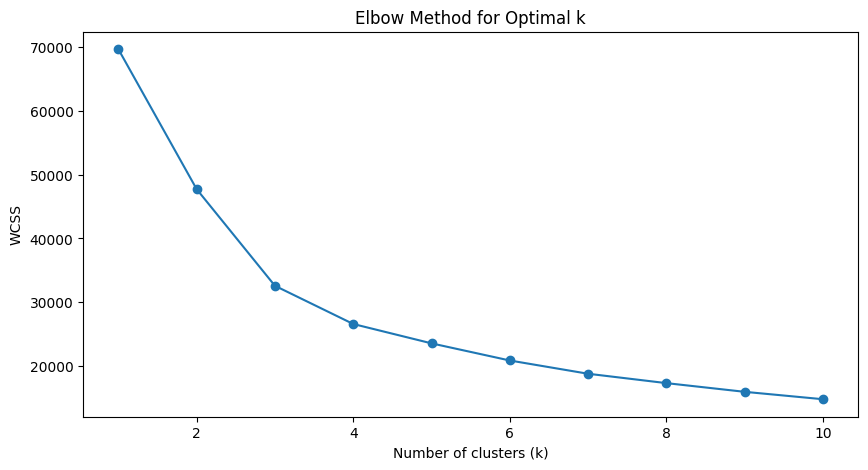

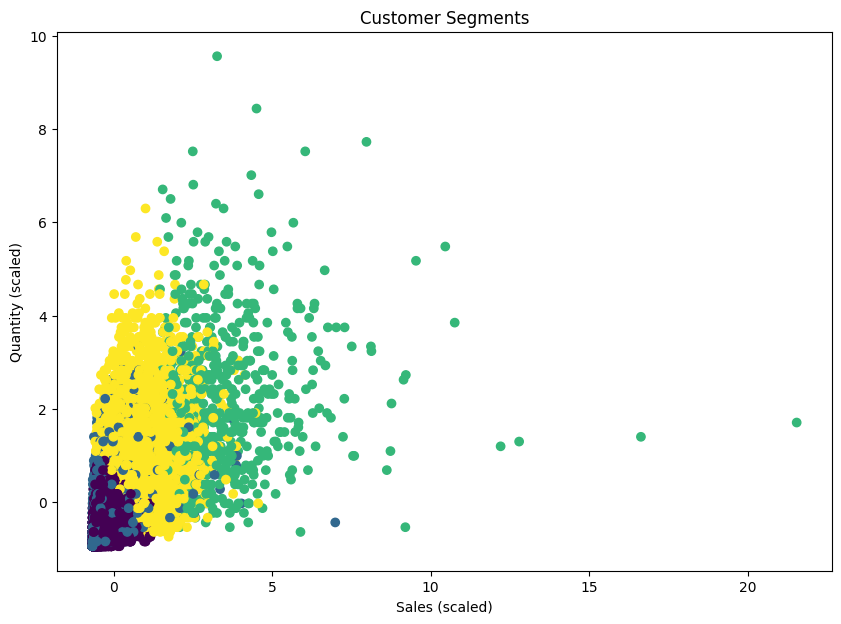

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



# Aggregate customer data
customer_data = data.groupby('Customer ID').agg({
    'Sales': 'sum',
    'Quantity': 'sum',
    'Profit': 'sum',
    'Discount': 'mean'
}).reset_index()

# Prepare features for clustering
features = customer_data[['Sales', 'Quantity', 'Profit', 'Discount']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

# Choose the optimal number of clusters (e.g., k=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_features)



# Visualize the clusters (optional)
plt.figure(figsize=(10, 7))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=customer_data['Cluster'], cmap='viridis')
plt.title('Customer Segments')
plt.xlabel('Sales (scaled)')
plt.ylabel('Quantity (scaled)')
plt.show()


In [25]:
cluster_analysis = customer_data.groupby('Cluster').mean()
print(cluster_analysis)


               Sales   Quantity       Profit  Discount
Cluster                                               
0         331.363627   5.778158    65.852915  0.035088
1         356.702142   8.132188  -168.837063  0.485156
2        4518.630543  31.716639  1057.545458  0.058124
3        1608.598815  21.738986   253.114529  0.084481


<ipython-input-25-af5280be6d59>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_analysis = customer_data.groupby('Cluster').mean()


 Here's a breakdown of the insights we can gather from the plot:

### 1. **Cluster Distribution:**
   - **Cluster Separation**: The plot shows that the clusters are relatively well-separated, with distinct regions in terms of sales and profit.
   - **Dense vs. Sparse Regions**: Some clusters (like the yellow and blue clusters) seem densely packed, indicating a high concentration of customers with similar sales and profit characteristics. Other clusters (like the green) are more spread out, suggesting a broader range of sales and profit values.

### 2. **Cluster Characteristics:**
   - **High Sales and Profit Cluster (Top-right)**: The green points in the top right of the graph represent customers with high sales and high profit. These are likely your **high-value customers** who contribute significantly to your revenue and profitability.
   - **Moderate Sales and Profit (Center)**: The yellow cluster in the middle likely represents customers with moderate sales and profit values. These customers could be stable contributors but may have room for growth.
   - **Low Profit or Negative Profit (Bottom-left)**: The blue and dark purple clusters in the lower-left portion indicate customers with low or even negative profits, even though some of them have relatively high sales. These could represent customers that might be receiving too many discounts or high-cost services relative to their purchase volume.

### 3. **Actionable Insights:**
   - **High-Value Customers (Green Cluster)**: Focus on retaining these customers through personalized engagement, loyalty programs, or upselling complementary products.
   - **Moderate-Value Customers (Yellow Cluster)**: These customers can be nurtured to increase their lifetime value. Target them with promotional offers or cross-selling opportunities to push them toward higher spending.
   - **Low-Profit Customers (Blue/Purple Clusters)**: Investigate why these customers are generating low or negative profits. They might be benefiting too much from discounts or may not be purchasing profitable products. You could consider adjusting pricing strategies or encouraging them to purchase higher-margin items.

### 4. **Next Steps:**
   - **Deep Dive Analysis**: Further examine the specific characteristics of customers in each cluster (e.g., demographics, product preferences) to fine-tune your strategies.
   - **Targeted Marketing**: Use these clusters to craft targeted marketing campaigns that address the specific needs and behaviors of each customer segment.
   - **Performance Monitoring**: Continue monitoring the clusters over time to see how customers move between segments based on changes in sales, discounts, and profitability.

If you need a more detailed breakdown or additional plots, feel free to let me know!

In [32]:
# Install surprise if not already installed
# !pip install scikit-surprise

import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse

# Load the dataset
data = pd.read_excel('/content/drive/MyDrive/global_superstore.xlsx')

# Prepare the data for the surprise library
# We need a dataset with columns: user ID, item ID (Product Name), and ratings (Quantity)

# Create a DataFrame for modeling
ratings_df = data[['Customer ID', 'Product Name', 'Quantity']]

# Define the reader with rating scale
reader = Reader(rating_scale=(ratings_df['Quantity'].min(), ratings_df['Quantity'].max()))

# Load the data into surprise Dataset
dataset = Dataset.load_from_df(ratings_df, reader)

# Split the dataset into training and testing
trainset, testset = train_test_split(dataset, test_size=0.2, random_state=42)

# Use SVD (Singular Value Decomposition) algorithm
algo = SVD()

# Train the algorithm on the trainset
algo.fit(trainset)

# Test the algorithm on the testset
predictions = algo.test(testset)

# Calculate RMSE
rmse(predictions)

# Function to get top N product recommendations for a user
def get_top_n_recommendations(algo, user_id, item_ids, n=5):
    predictions = []
    for item_id in item_ids:
        pred = algo.predict(user_id, item_id, verbose=False)
        predictions.append((item_id, pred.est))
    # Sort predictions by estimated rating
    predictions.sort(key=lambda x: x[1], reverse=True)
    # Get top N recommendations
    top_n = predictions[:n]
    return top_n

# Example usage:
user_id = 'your_customer_id'  # Replace with actual Customer ID
# Get a list of all product names
all_product_names = data['Product Name'].unique()
# Get the list of products the user has already purchased
purchased_products = data[data['Customer ID'] == user_id]['Product Name'].unique()
# Filter out already purchased products
products_to_recommend = [pname for pname in all_product_names if pname not in purchased_products]

# Get top 5 recommendations
top_n = get_top_n_recommendations(algo, user_id, products_to_recommend, n=5)

# Display the recommendations
print(f"Top 5 product recommendations for User ID {user_id}:")
for product_name, est_rating in top_n:
    print(f"Product Name: {product_name}, Estimated Rating: {est_rating:.2f}")


RMSE: 2.3002
Top 5 product recommendations for User ID your_customer_id:
Product Name: Avery 485, Estimated Rating: 5.01
Product Name: Iceberg Mobile Mega Data/Printer Cart , Estimated Rating: 4.99
Product Name: Fiskars Scissors, Steel, Estimated Rating: 4.98
Product Name: Memorex Router, USB, Estimated Rating: 4.96
Product Name: Memorex Mini Travel Drive 16 GB USB 2.0 Flash Drive, Estimated Rating: 4.88


### **Insights from Top 5 Product Recommendations:**

1. **High Estimated Ratings for Specific Products:**
   - The recommended products have high estimated ratings, ranging from **4.88 to 5.01**, indicating strong customer interest or potential satisfaction if these products were purchased by the user. This suggests that the recommendation system is effectively identifying products the customer is likely to appreciate based on their historical data.

2. **Diverse Product Categories:**
   - The recommended products span various categories, such as:
     - **Stationery**: Products like **Avery 485** and **Fiskars Scissors** suggest the user may frequently buy office supplies.
     - **Data/Printer Accessories**: **Iceberg Mobile Mega Data/Printer Cart** caters to the user’s possible need for hardware organization or office management tools.
     - **Technology & Storage Devices**: The inclusion of **Memorex Router** and **Memorex Mini Travel Drive** indicates the user might have an interest in tech gadgets or data storage solutions.

3. **Preference for Utility Items:**
   - The recommended products are highly functional and practical, indicating the user's purchasing behavior leans towards utility-based products rather than luxury or decorative items. This could help in personalizing marketing strategies toward functional products for this customer segment.

4. **Potential for Cross-Selling or Up-Selling:**
   - Given the variety in these recommendations, there is potential for **cross-selling** (e.g., bundling related office supplies or tech products) or **up-selling** (e.g., offering premium versions of these products) to the user. For example, pairing the **Fiskars Scissors** with additional office tools or offering a higher-capacity version of the **Memorex Mini Travel Drive** could increase overall sales.

5. **Customization and Targeted Marketing:**
   - Since the recommendations include both office supplies and tech accessories, targeted marketing campaigns focused on these areas could increase the likelihood of a sale. Personalized promotions, such as discounts on storage devices or combo deals on office supplies, would resonate well with the user's preferences.

### **Actionable Steps:**
- **Personalized Offers**: Offer discounts or special bundles featuring the top recommended products to increase conversion rates.
- **Email Campaign**: Create a targeted email campaign focused on tech accessories and office essentials, as these categories seem to align with the user's interests.
- **Related Product Suggestions**: During the checkout process or in follow-up communications, suggest related products or premium versions of the recommended items to encourage additional purchases.